In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tmp = pd.read_html('https://uk.m.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C',  match= 'Коефіцієнт народжуваності в регіонах')

In [13]:
tmp.shape
print(tmp.head(3))
tmp.replace('—', np.nan, inplace = True)
print(tmp)
tmp.drop(27, inplace = True)
print(tmp.dtypes)
tmp = tmp.astype({'2014': np.float64})
tmp = tmp.astype({'2019': np.float64})
print(tmp.dtypes)

      Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0       Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1  Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2  Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
               Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0                Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2           Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4            Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120.0   79.0
6        Закарпатська  314.0  273.0  207.0   168   115   151  146.0  104.0
7          Запорізька  219.0  197.0  150.0   124    71   106  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0   155   103   124 

In [14]:
for i in tmp:
    if i == 'Регіон':
        continue
    else:
        tmp.fillna({i :tmp[i].mean()}, inplace= True)

In [18]:
print(tmp[tmp['2019'] > tmp['2019'].mean()])
print(tmp[tmp['2014'] == tmp['2014'].max()])

               Регіон    1950   1960   1970  1990  2000  2012   2014   2019
2           Волинська  247.00  250.0  179.0   153   112   148  141.0  101.0
6        Закарпатська  314.00  273.0  207.0   168   115   151  146.0  104.0
8   Івано-Франківська  243.00  248.0  182.0   155   103   124  122.0   88.0
12          Львівська  234.00  240.0  171.0   140    91   119  119.0   87.0
14            Одеська  241.00  192.0  148.0   126    80   127  123.0   88.0
16         Рівненська  269.00  267.0  193.0   158   118   159  148.0  107.0
20         Херсонська  208.00  214.0  166.0   143    85   117  115.0   81.0
23        Чернівецька  247.00  218.0  170.0   148   101   128  129.0   92.0
25               Київ  231.04  174.0  159.0   120    73   120  121.0  110.0
        Регіон   1950   1960   1970  1990  2000  2012   2014   2019
16  Рівненська  269.0  267.0  193.0   158   118   159  148.0  107.0


<BarContainer object of 27 artists>

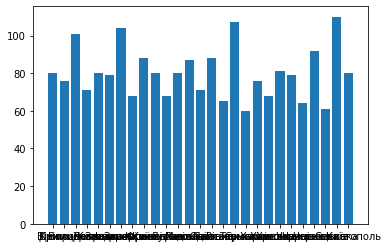

In [19]:
plt.bar(tmp['Регіон'], tmp['2019'])